##**Kelompok 15**
* Aisyah Gefira (2006572945)
* Aldinda Albanna (2006533295)
* Irba Alifa Taqiyya (2006571223)

Sumber: https://www.ncbi.nlm.nih.gov/sites/GDSbrowser

DataSet Record GDS4418

In [ ]:
#Install GEOquery package
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.17")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'roxygen2', 'textshaping', 'whisker', 'boot'



In [ ]:
BiocManager::install(c("Biobase", "GEOquery"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'Biobase' 'GEOquery'”
Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'roxygen2', 'textshaping', 'whisker', 'boot'



In [ ]:
library(Biobase)
library(GEOquery)

In [ ]:
## Download the dataset ##
dtgeo <- getGEO('GDS4418', destdir=".")

Using locally cached version of GDS4418 found here:
./GDS4418.soft.gz 



In [ ]:
## Show the content of object dtgeo ##
dtgeo

An object of class "GDS"
channel_count 
[1] "1"
dataset_id 
[1] "GDS4418" "GDS4418"
description 
[1] "Analysis of bronchial biopsies from allergic asthma (AA) subjects.  These results, together with those from GDS4417 (a study with similar specimen collection procedures, but different subjects, GeneChips, data processing), provide insight into molecular mechanisms underlying AA pathophysiology."
[2] "control"                                                                                                                                                                                                                                                                                                
[3] "allergic asthma"                                                                                                                                                                                                                                                                                      

In [ ]:
### convert to Expression Set ###
eset <- GDS2eSet(dtgeo,do.log2=TRUE)
## Show the converted object ##
eset

Using locally cached version of GPL96 found here:
/tmp/Rtmp9l2kbI/GPL96.annot.gz 



ExpressionSet (storageMode: lockedEnvironment)
assayData: 22283 features, 8 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1020960 GSM1020961 ... GSM1020967 (8 total)
  varLabels: sample disease.state description
  varMetadata: labelDescription
featureData
  featureNames: 1007_s_at 1053_at ... AFFX-TrpnX-M_at (22283 total)
  fvarLabels: ID Gene title ... GO:Component ID (21 total)
  fvarMetadata: Column labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 19842841 
Annotation:  

In [ ]:
##Phenotype Data
phdtgeo <- pData (eset)
head(phdtgeo)

,sample,disease.state,description
,<chr>,<fct>,<chr>
GSM1020960,GSM1020960,control,Value for GSM1020960: c.1; src: control_bronchial biopsies
GSM1020961,GSM1020961,control,Value for GSM1020961: c.2; src: control_bronchial biopsies
GSM1020962,GSM1020962,control,Value for GSM1020962: c.3; src: control_bronchial biopsies
GSM1020963,GSM1020963,control,Value for GSM1020963: c.4; src: control_bronchial biopsies
GSM1020964,GSM1020964,allergic asthma,Value for GSM1020964: aa.1; src: allergic_asthmatic_bronchial biopsies
GSM1020965,GSM1020965,allergic asthma,Value for GSM1020965: aa.2; src: allergic_asthmatic_bronchial biopsies


In [ ]:
#Expression data
expdtgeo<-exprs(eset)
dim(expdtgeo)

[1] 22283     8

In [ ]:
head(expdtgeo)

,GSM1020960,GSM1020961,GSM1020962,GSM1020963,GSM1020964,GSM1020965,GSM1020966,GSM1020967
1007_s_at,3.365651,3.340876,3.372409,3.370206,3.351233,3.371852,3.427177,3.344601
1053_at,2.320002,2.345822,2.355887,2.354782,2.361406,2.343698,2.368545,2.415594
117_at,2.517467,2.478488,2.467290,2.475819,2.428802,2.447899,2.448843,2.506820
121_at,3.025883,3.009834,3.040172,3.055879,2.981308,2.997374,3.035941,3.015376
1255_g_at,2.050463,2.015126,2.013723,2.048770,2.000793,1.989404,2.048062,2.009648
1294_at,2.960525,2.914964,2.951910,2.863623,2.976840,2.963376,2.936335,2.992161


In [ ]:
#Load Annotation
Meta(dtgeo)$platform

[1] "GPL96"

In [ ]:
annotation(eset)<-"hgu133a"

In [ ]:
#Perform Feature selection/gene filtering
BiocManager::install("genefilter") #install gene filter
require(genefilter)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'genefilter'

also installing the dependencies ‘matrixStats’, ‘XML’, ‘xtable’, ‘MatrixGenerics’, ‘annotate’


Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'roxygen2', 'textshaping', 'whisker', 'boot'

Loading required package: genefilter



In [ ]:
#melakukan gene filtering
esetFilt = nsFilter(eset)

#hasil filtering
esetFilt

$eset
ExpressionSet (storageMode: lockedEnvironment)
assayData: 6321 features, 8 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1020960 GSM1020961 ... GSM1020967 (8 total)
  varLabels: sample disease.state description
  varMetadata: labelDescription
featureData
  featureNames: 206797_at 216705_s_at ... 205241_at (6321 total)
  fvarLabels: ID Gene title ... GO:Component ID (21 total)
  fvarMetadata: Column labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 19842841 
Annotation: hgu133a 

$filter.log
$filter.log$numDupsRemoved
[1] 7551

$filter.log$numLowVar
[1] 6322

$filter.log$numRemoved.ENTREZID
[1] 2079

$filter.log$feature.exclude
[1] 10



In [ ]:
#extract the expression of the filtered dataset
expdtgeoFilt <- exprs(esetFilt$eset)

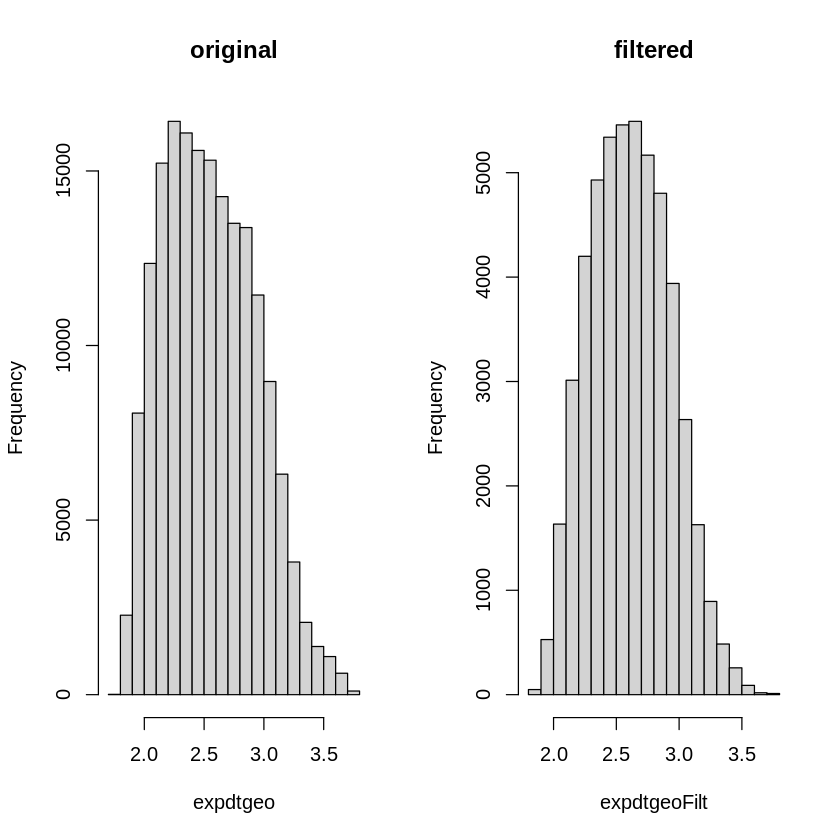

In [ ]:
#plot the original and filtered data
par(mfrow=c(1,2))
hist(expdtgeo, main='original')
hist(expdtgeoFilt, main='filtered')

In [ ]:
## Data Analysis ##

## Differentially Expressed Genes using LIMMA ##

## Analysis ##
vargrp <- phdtgeo[,2]
table(vargrp)

vargrp
allergic asthma         control 
              4               4 

In [ ]:
### Assign Group Code ###
group <- ifelse(vargrp=="allergic asthma",0,1)

In [ ]:
## Install Limma ##
BiocManager::install("limma")

### Limma Analysis ###
library(limma)
design <- model.matrix(~group)
fit <- eBayes(lmFit(expdtgeoFilt, design))
fit

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'limma'”
Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'roxygen2', 'textshaping', 'whisker', 'boot'


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




An object of class "MArrayLM"
$coefficients
            (Intercept)       group
206797_at      2.415105  0.02409380
216705_s_at    2.118506 -0.03047670
203441_s_at    2.271560  0.01267435
212609_s_at    2.558833  0.09112708
207079_s_at    2.500172 -0.07558289
6316 more rows ...

$rank
[1] 2

$assign
[1] 0 1

$qr
$qr
  (Intercept)      group
1  -2.8284271 -1.4142136
2   0.3535534 -1.4142136
3   0.3535534  0.2612039
4   0.3535534  0.2612039
5   0.3535534 -0.4459029
6   0.3535534 -0.4459029
7   0.3535534 -0.4459029
8   0.3535534 -0.4459029
attr(,"assign")
[1] 0 1

$qraux
[1] 1.353553 1.261204

$pivot
[1] 1 2

$tol
[1] 1e-07

$rank
[1] 2


$df.residual
[1] 6 6 6 6 6
6316 more elements ...

$sigma
  206797_at 216705_s_at 203441_s_at 212609_s_at 207079_s_at 
 0.05521510  0.06036334  0.02799123  0.08732201  0.04452125 
6316 more elements ...

$cov.coefficients
            (Intercept) group
(Intercept)        0.25 -0.25
group             -0.25  0.50

$stdev.unscaled
            (Intercept)    

In [ ]:
## Show Only Top 50 Genes ##
topResult <- topTable(fit, coef=2, number=50)

### Selected Genes ###
rownames(topResult)

[1] "206207_at"   "211906_s_at" "206121_at"   "215118_s_at" "202992_at"  
 [6] "201884_at"   "215783_s_at" "209613_s_at" "204931_at"   "219795_at"  
[11] "205898_at"   "210809_s_at" "210037_s_at" "201487_at"   "218963_s_at"
[16] "218579_s_at" "207328_at"   "204614_at"   "201037_at"   "205328_at"  
[21] "204331_s_at" "212240_s_at" "222268_x_at" "221665_s_at" "204351_at"  
[26] "218730_s_at" "218095_s_at" "219759_at"   "213994_s_at" "209220_at"  
[31] "204341_at"   "205382_s_at" "219597_s_at" "201645_at"   "217110_s_at"
[36] "218049_s_at" "201937_s_at" "209485_s_at" "218608_at"   "205357_s_at"
[41] "205403_at"   "208763_s_at" "202790_at"   "204409_s_at" "204955_at"  
[46] "205608_s_at" "219429_at"   "214581_x_at" "217867_x_at" "209541_at"

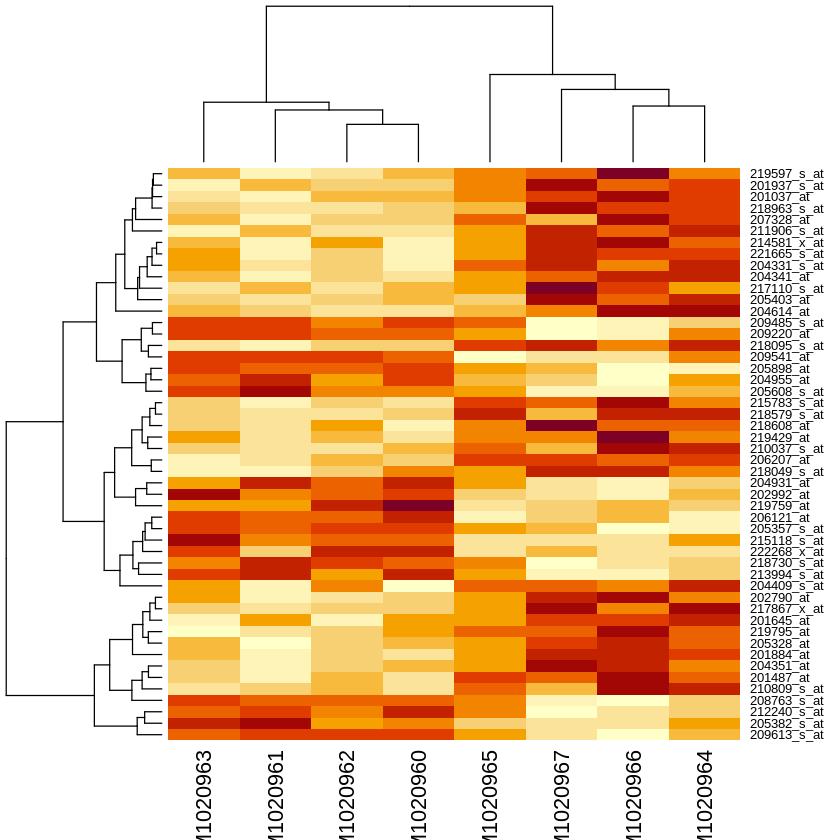

In [ ]:
## Extract Selected Gene Names ##
selected <- rownames(expdtgeoFilt) %in% rownames(topResult)

## Extract The Expression of The Selected Genes ##
expdtgeosel <- expdtgeoFilt[selected, ]

### Heatmap of The Top Genes ###
heatmap(expdtgeosel)

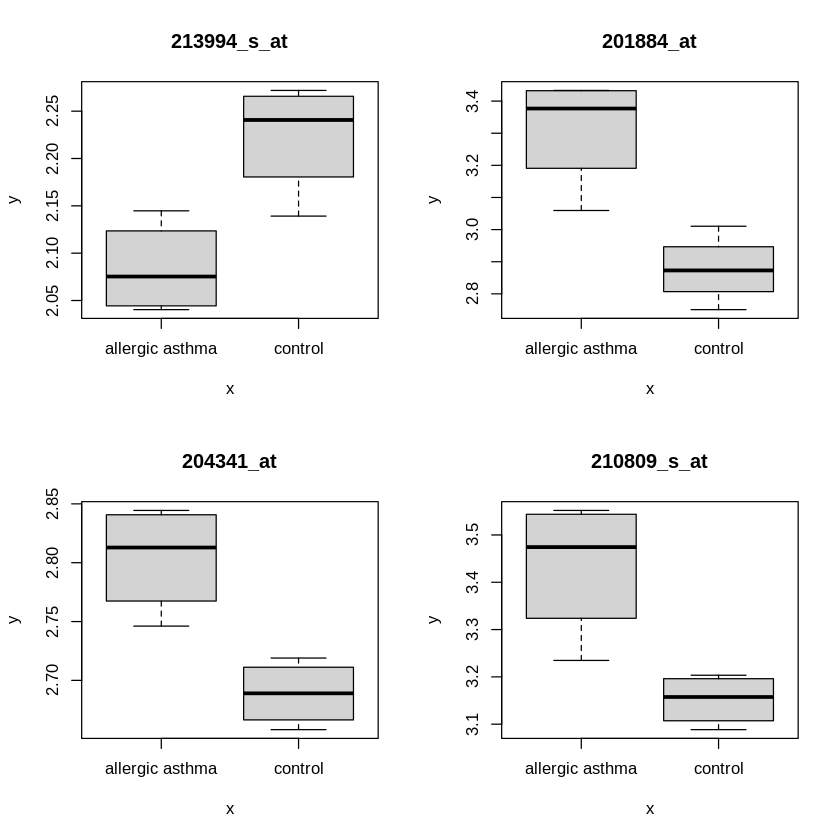

In [ ]:
### Boxplot for The Top 4 Genes ###
par(mfrow=c(2,2))
for(i in 1:4) plot(vargrp, expdtgeosel[i,], main=rownames(expdtgeosel)[i])

In [ ]:
#download chip annotation database
BiocManager::install ("hgu133a.db")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'hgu133a.db'”
Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'roxygen2', 'textshaping', 'whisker', 'boot'



In [ ]:
library(hgu133a.db)

In [ ]:
### See Gene Name and Description ###
library("annotate")
library("hgu133a.db")   #Depends on your chip

GeneSelected <- select(hgu133a.db, rownames(topResult), c("SYMBOL","ENTREZID",
                                                          "GENENAME"))
GeneSelected

'select()' returned 1:1 mapping between keys and columns



PROBEID,SYMBOL,ENTREZID,GENENAME
<chr>,<chr>,<chr>,<chr>
206207_at,CLC,1178,Charcot-Leyden crystal galectin
211906_s_at,SERPINB4,6318,serpin family B member 4
206121_at,AMPD1,270,adenosine monophosphate deaminase 1
215118_s_at,IGH,3492,immunoglobulin heavy locus
202992_at,C7,730,complement C7
201884_at,CEACAM5,1048,CEA cell adhesion molecule 5
215783_s_at,ALPL,249,"alkaline phosphatase, biomineralization associated"
209613_s_at,ADH1B,125,"alcohol dehydrogenase 1B (class I), beta polypeptide"
204931_at,TCF21,6943,transcription factor 21


In [ ]:
ids <- rownames(topResult)
GeneSelected <- select(hgu133a.db, ids, c("SYMBOL","ENTREZID","GENENAME","GO"))

'select()' returned 1:many mapping between keys and columns



In [ ]:
### TAMBAHAN: Differentially Expressed Genes using T-Test ###
group <- ifelse(vargrp == "control", 0, 1)

dim(expdtgeoFilt)

[1] 6321    8

In [ ]:
t.test(group, expdtgeoFilt[1,])$p.value

[1] 1.702058e-05

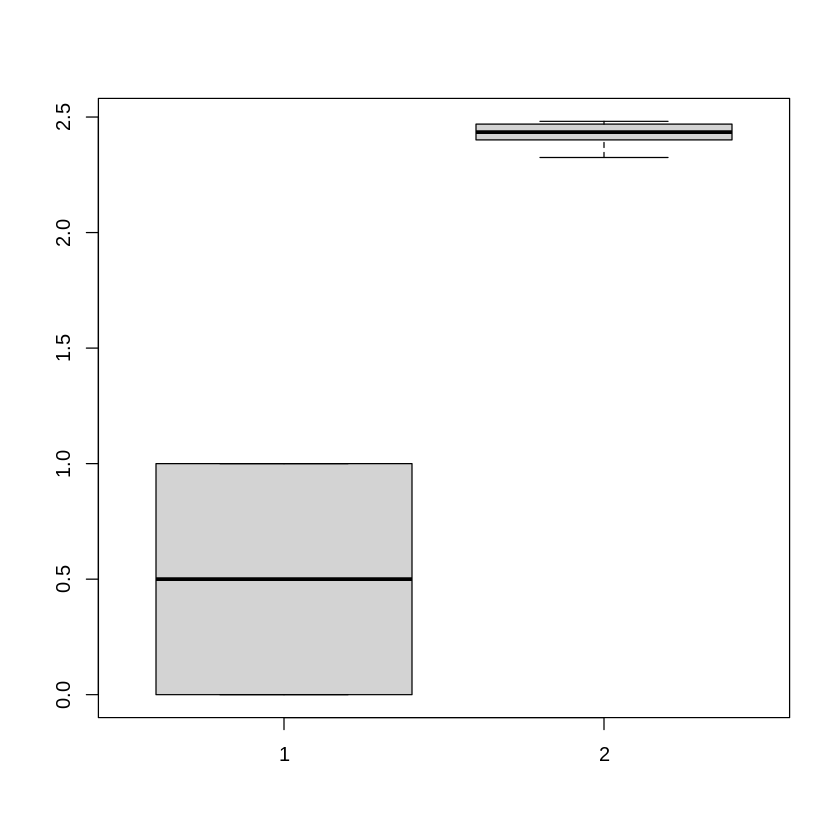

In [ ]:
boxplot(group, expdtgeoFilt[1,])

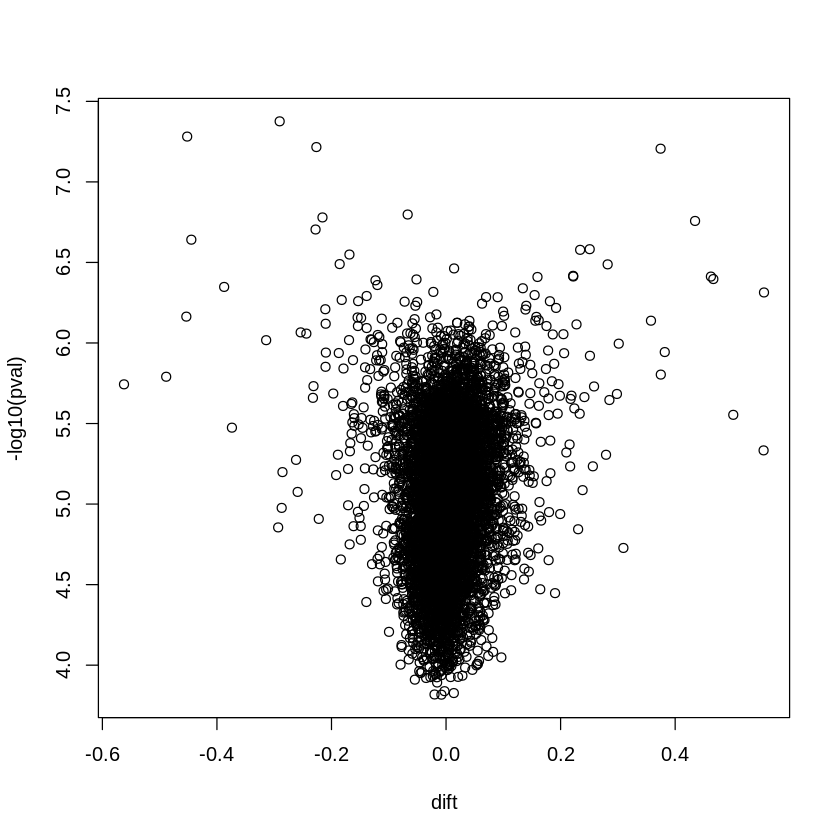

In [ ]:
pval <- apply(expdtgeoFilt, 1, function(x) t.test(group, x)$p.value)
dift <- apply(expdtgeoFilt, 1, function(x) diff(t.test(x[1:4], x[5:8])$estimate))

plot(dift, -log10(pval))

[1] 6321

[1] 2939

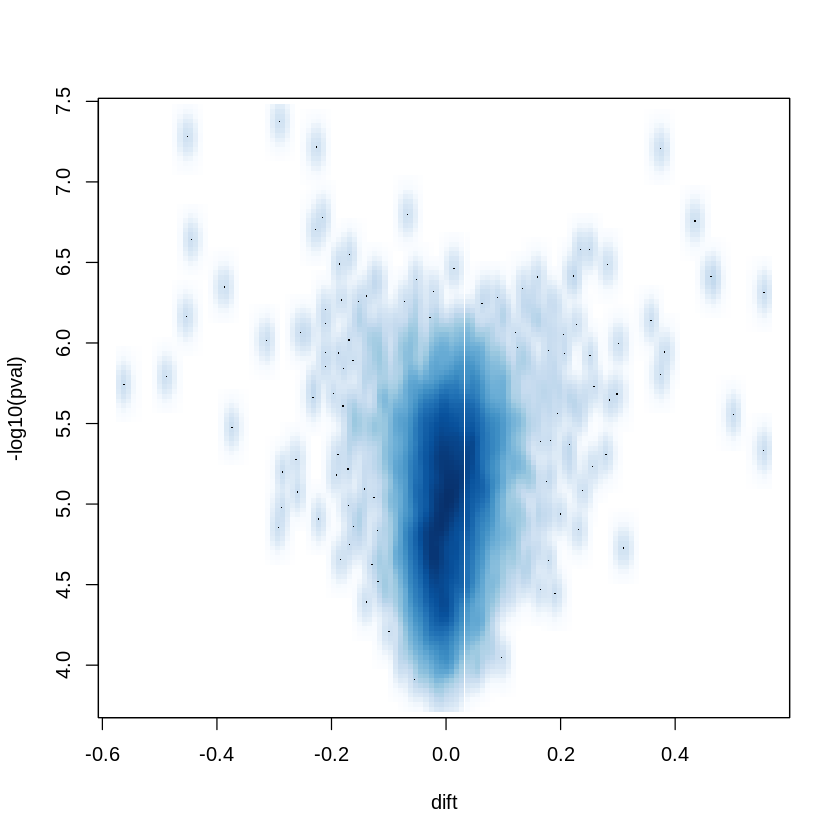

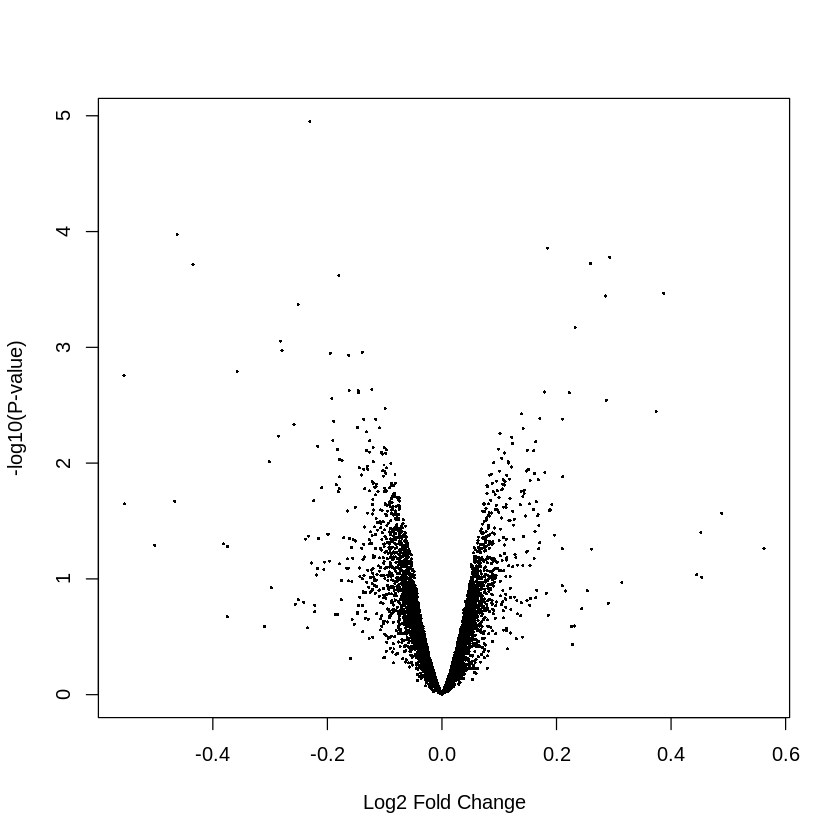

In [ ]:
library(RColorBrewer)

smoothScatter(dift, -log10(pval))

sum(pval < 0.05)

pvalBonf <- p.adjust(pval, method = "bonferroni" )

sum(pvalBonf < 0.05)

## limma ##

volcanoplot(fit, coef = 2)

Mengetahui model dan fungsi gen

In [ ]:
##install GO.db
BiocManager::install ("GO.db")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'GO.db'

Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'roxygen2', 'textshaping', 'whisker', 'boot'



In [ ]:
## Gene ontology for the top genes
library(GO.db)
GOselected <- select(GO.db, GeneSelected$GO, c("TERM","GOID"))
head(GOselected)



'select()' returned many:1 mapping between keys and columns



,GOID,TERM
,<chr>,<chr>
1,GO:0002667,regulation of T cell anergy
2,GO:0002724,regulation of T cell cytokine production
3,GO:0005515,protein binding
4,GO:0005829,cytosol
5,GO:0030246,carbohydrate binding
6,GO:0042802,identical protein binding


In [ ]:
#combine the result
finalres <- cbind(GeneSelected, GOselected)
head(finalres)

,PROBEID,SYMBOL,ENTREZID,GENENAME,GO,EVIDENCE,ONTOLOGY,GOID,TERM
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,206207_at,CLC,1178,Charcot-Leyden crystal galectin,GO:0002667,IMP,BP,GO:0002667,regulation of T cell anergy
2,206207_at,CLC,1178,Charcot-Leyden crystal galectin,GO:0002724,IMP,BP,GO:0002724,regulation of T cell cytokine production
3,206207_at,CLC,1178,Charcot-Leyden crystal galectin,GO:0005515,IPI,MF,GO:0005515,protein binding
4,206207_at,CLC,1178,Charcot-Leyden crystal galectin,GO:0005829,IDA,CC,GO:0005829,cytosol
5,206207_at,CLC,1178,Charcot-Leyden crystal galectin,GO:0030246,IEA,MF,GO:0030246,carbohydrate binding
6,206207_at,CLC,1178,Charcot-Leyden crystal galectin,GO:0042802,IPI,MF,GO:0042802,identical protein binding


Terima Kasih